In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#Read the csv file
df=pd.read_csv('https://raw.githubusercontent.com/vikram0230/Henry-Harvin-project/master/train.csv',index_col = 'Loan_ID')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [3]:
#Replace values with binary
df['Loan_Status']=df['Loan_Status'].replace('Y',1)
df['Loan_Status']=df['Loan_Status'].replace('N',0)
df['Self_Employed']=df['Self_Employed'].replace('Yes',1)
df['Self_Employed']=df['Self_Employed'].replace('No',0)
df['Education']=df['Education'].replace('Graduate',1)
df['Education']=df['Education'].replace('Not Graduate',0)
df['Married']=df['Married'].replace('Yes',1)
df['Married']=df['Married'].replace('No',0)
df['Dependents']=df['Dependents'].replace('3+',3)
#Filling empty spaces with 0
df.isnull().sum()
df=df.fillna(0)
x=df.iloc[:,2:10]
y=df.iloc[:,11]

In [4]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [5]:
df.head(10)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
Loan_ID,,,,,,,,,,,,
LP001002,Male,0.0,0,1,0.0,5849,0.0,0.0,360.0,1.0,Urban,1
LP001003,Male,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
LP001011,Male,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,Urban,1
LP001013,Male,1.0,0,0,0.0,2333,1516.0,95.0,360.0,1.0,Urban,1
LP001014,Male,1.0,3,1,0.0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
LP001018,Male,1.0,2,1,0.0,4006,1526.0,168.0,360.0,1.0,Urban,1


In [6]:
app = df[['applicantincome','loan_status']]
coapp = df[['coapplicantincome','loan_status']]

In [7]:
#scatter plot
app_1 = app[app.loan_status == 1]
app_0 = app[app.loan_status == 0]
coapp_1 = coapp[coapp.loan_status == 1]
coapp_0 = coapp[coapp.loan_status == 0]

Text(0.5, 0, 'Applicant Income')

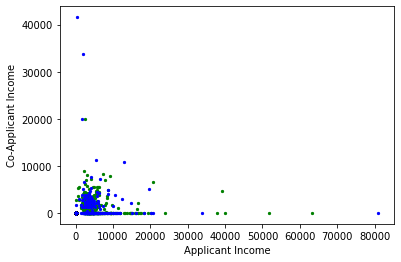

In [24]:
plt.scatter(app_1,coapp_1,s=5,color='green')
plt.scatter(app_0,coapp_0,s=5,color='blue')
plt.ylabel('Co-Applicant Income')
plt.xlabel('Applicant Income')

In [10]:
np.size(app_1),np.size(coapp_1)

(844, 844)

In [11]:
np.size(app_0),np.size(coapp_0)

(384, 384)

In [12]:
df.shape

(614, 12)

In [13]:
#Creating test and train model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=0)

In [14]:
#Scaling the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [16]:
#Fitting the model
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#predicting the model
y_predict=lr.predict(x_test)
print(y_predict)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1]


In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_predict)
print(cf)

[[ 29  31]
 [ 13 132]]


Text(0, 0.5, 'Loans Sanctioned')

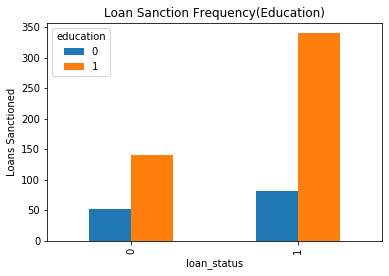

In [19]:
#Loan Sanction Freqency depending on Education
pd.crosstab(df.loan_status,df.education).plot(kind='bar')
plt.title('Loan Sanction Frequency(Education)')
plt.ylabel('Loans Sanctioned')

Text(0, 0.5, 'No. of Loans')

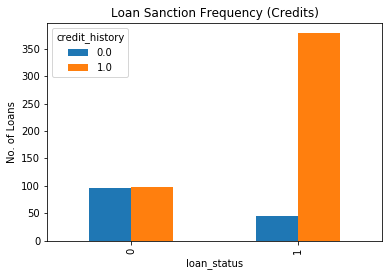

In [20]:
#Loan Sanction frequency depending on Credit History
pd.crosstab(df.loan_status,df.credit_history).plot(kind='bar')
plt.title('Loan Sanction Frequency (Credits)')
plt.ylabel('No. of Loans')
# credit(1) = loan(1)

Text(0, 0.5, 'Loan Status')

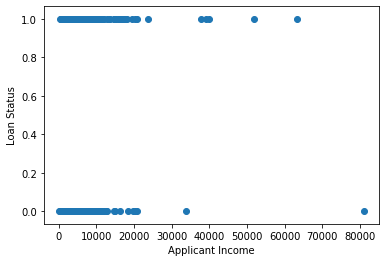

In [21]:
#Loan Status vs Applicant income
plt.scatter(df.applicantincome,df.loan_status)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status')

Text(0, 0.5, 'true positive rate')

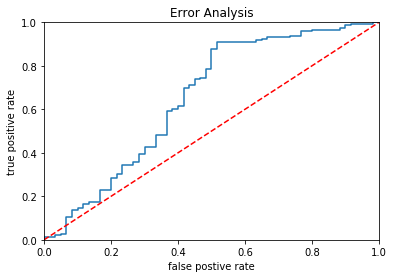

In [22]:
#ROC Curve
fpr,tpr,thresholds=roc_curve(y_test,lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Error Analysis')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.69      0.48      0.57        60
           1       0.81      0.91      0.86       145

    accuracy                           0.79       205
   macro avg       0.75      0.70      0.71       205
weighted avg       0.77      0.79      0.77       205

